# CoinGecko REST API: extracting crypto currency data

## Libraries and settings

In [1]:
# Libraries
import os
import locale
import pandas as pd
locale.setlocale(locale.LC_ALL,"")

import matplotlib.pyplot as plt

# Define settings for graphics
# plt.style.use('dark_background')

from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: /workspaces/data_ingestion/03_CoinGecko_WebAPI


## Get data

In [2]:
# Simple price endpoint with the required parameters
cg.get_price(ids='bitcoin', vs_currencies='usd')

{'bitcoin': {'usd': 79406}}

In [3]:
# Multiple arguments (USD)
cg.get_price(ids=['bitcoin', 'near', 'ethereum', 'dogecoin'], vs_currencies='usd')

{'bitcoin': {'usd': 79468},
 'dogecoin': {'usd': 0.242762},
 'ethereum': {'usd': 3198.36},
 'near': {'usd': 4.73}}

In [4]:
# Multiple arguments (USD & EUR)
cg.get_price(ids=['bitcoin', 'near', 'ethereum, dogecoin'], vs_currencies=['usd', 'eur'])

{'bitcoin': {'usd': 79467, 'eur': 74140},
 'dogecoin': {'usd': 0.242762, 'eur': 0.226489},
 'ethereum': {'usd': 3198.24, 'eur': 2983.85},
 'near': {'usd': 4.73, 'eur': 4.41}}

In [5]:
# Pass optional parameters as defined in the API doc (https://www.coingecko.com/api/docs/v3)
data = cg.get_price( ids='bitcoin, near, ethereum, dogecoin', 
                     vs_currencies='usd', 
                     include_market_cap='true', 
                     include_24hr_vol='true', 
                     include_24hr_change='true', 
                     include_last_updated_at='true')
data

{'bitcoin': {'usd': 79372,
  'usd_market_cap': 1572481814823.9575,
  'usd_24h_vol': 54419759255.00391,
  'usd_24h_change': 3.842339587335931,
  'last_updated_at': 1731241781},
 'dogecoin': {'usd': 0.242443,
  'usd_market_cap': 35718108366.723015,
  'usd_24h_vol': 8038494494.862506,
  'usd_24h_change': 18.178821512553753,
  'last_updated_at': 1731241783},
 'ethereum': {'usd': 3194.16,
  'usd_market_cap': 385343655460.2956,
  'usd_24h_vol': 33269760231.215504,
  'usd_24h_change': 5.035622111844476,
  'last_updated_at': 1731241784},
 'near': {'usd': 4.73,
  'usd_market_cap': 5723997545.54375,
  'usd_24h_vol': 653137852.7721941,
  'usd_24h_change': 7.398644314205451,
  'last_updated_at': 1731241785}}

In [6]:
# Extract single values
names = list(data.keys())
print(names)
print("----------------")

# Price of the first element in list
print(names[0])
print(data[names[0]]["usd"])

['bitcoin', 'dogecoin', 'ethereum', 'near']
----------------
bitcoin
79372


## Extract and plot data

In [7]:
# Keys from dictionary
names = list(data.keys())

# Get values from dictionary and format to 2 decimal places
values = []
for i in range(len(names)):
    vals = data[names[i]]["usd"]
    formatted_val = f'{vals:.2f}'
    values.append(formatted_val)

# Create DataFrame
df = pd.DataFrame({
    'Name': names,
    'Value': values})

# Convert 'Value' column to numeric
df['Value'] = pd.to_numeric(df['Value'])

# Sort DataFrame by 'Value' in descending order
df = df.sort_values(by='Value', ascending=False)

print(df)

       Name     Value
0   bitcoin  79372.00
2  ethereum   3194.16
3      near      4.73
1  dogecoin      0.24


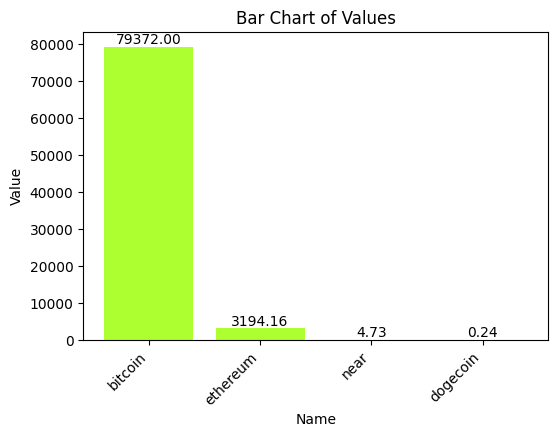

In [8]:
# Create bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(df['Name'], df['Value'], color='greenyellow')
plt.xlabel('Name')
plt.ylabel('Value')
plt.title('Bar Chart of Values')
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             yval + 0.05, f'{yval:.2f}', 
             ha='center', 
             va='bottom')
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [9]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-10 12:32:06
Python Version: 3.11.10
-----------------------------------
